# 05 - Clustering using k-means

## Table of Contents:
1. Import libraries + data
2. Elbow technique
3. k-means clustering

## Import libraries + data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# import data path

path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [4]:
# import beer_clean_final.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'beer_clean_final.pkl'))

In [5]:
# display all columns
pd.options.display.max_columns = None

In [6]:
# display 100 rows
pd.options.display.max_rows = 100

In [7]:
df.shape

(43487, 24)

In [8]:
df.head()

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,month,day_of_month,day_of_week,time,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03,2022,Jul,3,Sunday,0,2.0,420.00,180.00,140.00,50.00,30.00,both,low abv,7,6
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09,2022,Jul,9,Saturday,13,4.0,960.00,240.00,400.00,71.43,20.00,both,low abv,7,5
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19,2022,Jul,19,Tuesday,20,5.0,1440.00,60.00,740.00,105.71,4.00,both,low abv,7,1
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20,2022,Mar,20,Sunday,17,4.0,412.23,277.77,52.23,14.51,40.26,both,low abv,3,6
4,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-23,2022,Mar,23,Wednesday,17,2.0,360.00,40.00,180.00,100.00,10.00,both,low abv,3,2


## 2. Elbow technique

In [9]:
# Define the range of potential clusters in the data.

num_cl = range(1, 10) 

# Define k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
df.isnull().sum()

product_code           0
vendor                 0
name                   0
retail_price           0
product_unit           0
vendor_country         0
size                   0
abv                    0
full_date              0
year                   0
month                  0
day_of_month           0
day_of_week            0
time                   0
units_sold             0
revenue                0
discount            8749
profit                 0
percent_markup         0
percent_discount    8749
_merge                 0
abv_category           0
month_no               0
weekday_no             0
dtype: int64

In [11]:
# create a subset of df with only numerical value columns

columns_num = ['product_code', 'retail_price', 'size', 'abv', 'year', 'day_of_month', 'time', 'units_sold', 'revenue', 'profit', 'percent_markup', 'month_no', 'weekday_no']

In [12]:
df_sub = df[columns_num]

In [13]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

/Users/alliecarlisle/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alliecarlisle/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/alliecarlisle/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to '

[-302741373538.58856,
 -154901229504.1515,
 -106901392243.99643,
 -73606931592.49973,
 -59316709266.89355,
 -48926662274.167755,
 -43155089368.792885,
 -38323362070.88521,
 -34942067667.22334]

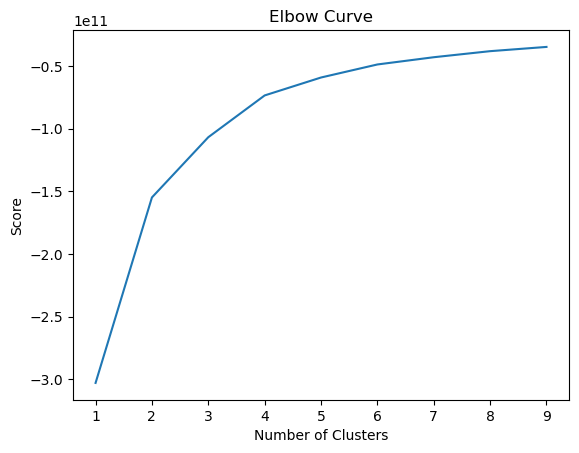

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Notes - starting at 4 it starts to straighten out, so I'll use the optimal count for clusters as 4.

## 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [16]:
# Fit the k-means object to the dataframe

kmeans.fit(df_sub)

/Users/alliecarlisle/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/Users/alliecarlisle/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/w0/qzmf_lf542x0x6lpcdj7lnww0000gn/T/ipykernel_11723/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [18]:
df_sub.head()

,product_code,retail_price,size,abv,year,day_of_month,time,units_sold,revenue,profit,percent_markup,month_no,weekday_no,clusters
0,5028,300.0,0.375,4.5,2022,3,0,2.0,420.00,140.00,50.00,7,6,2
1,5028,300.0,0.375,4.5,2022,9,13,4.0,960.00,400.00,71.43,7,5,2
2,5028,300.0,0.375,4.5,2022,19,20,5.0,1440.00,740.00,105.71,7,1,2
3,4846,200.0,0.330,3.0,2022,20,17,4.0,412.23,52.23,14.51,3,6,2
4,4846,200.0,0.330,3.0,2022,23,17,2.0,360.00,180.00,100.00,3,2,2


In [19]:
df_sub['clusters'].value_counts()

0    21870
2    15602
3     4751
1     1264
Name: clusters, dtype: int64

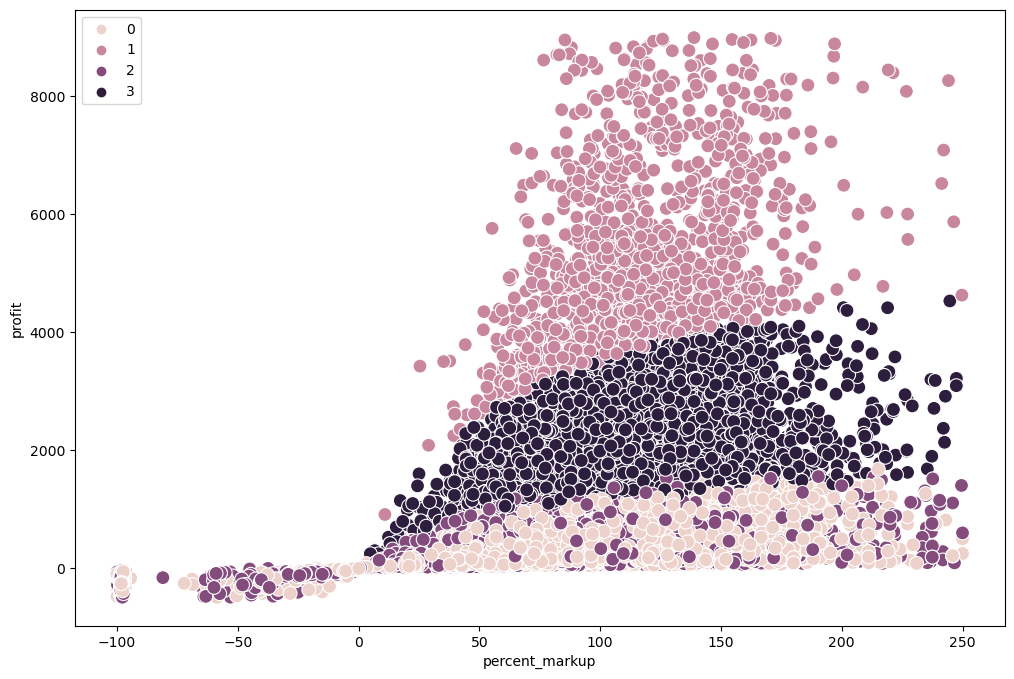

In [20]:
# Plot the clusters for the "percent_markup" and "profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['percent_markup'], y=df_sub['profit'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('percent_markup') # Label x-axis.
plt.ylabel('profit') # Label y-axis.
plt.show()

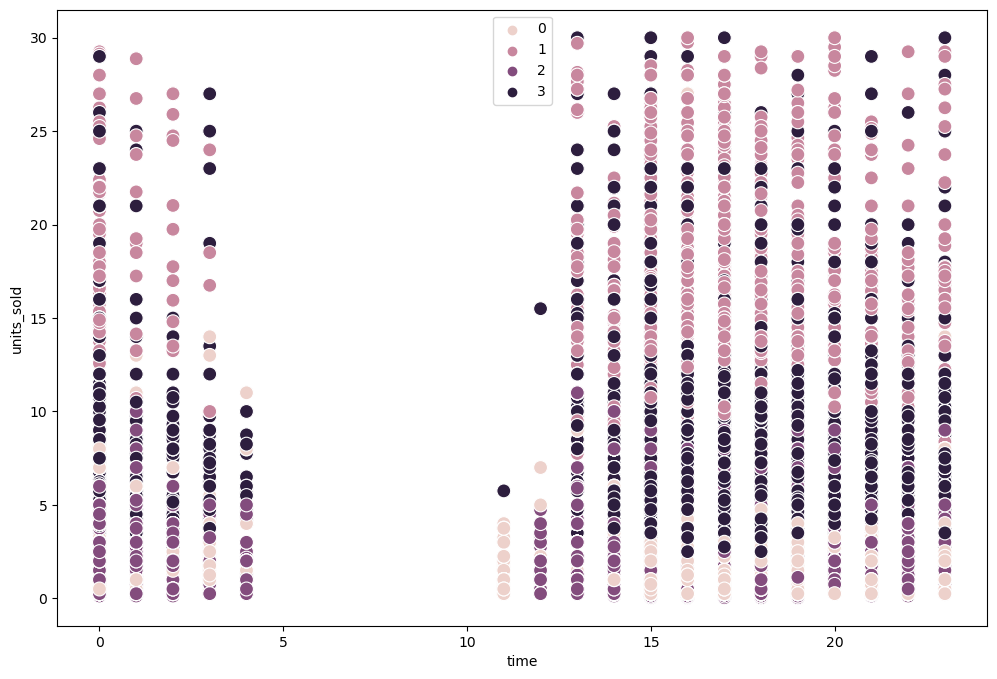

In [21]:
# Plot the clusters for the "time" and "units_sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['time'], y=df_sub['units_sold'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('time') # Label x-axis.
plt.ylabel('units_sold') # Label y-axis.
plt.show()

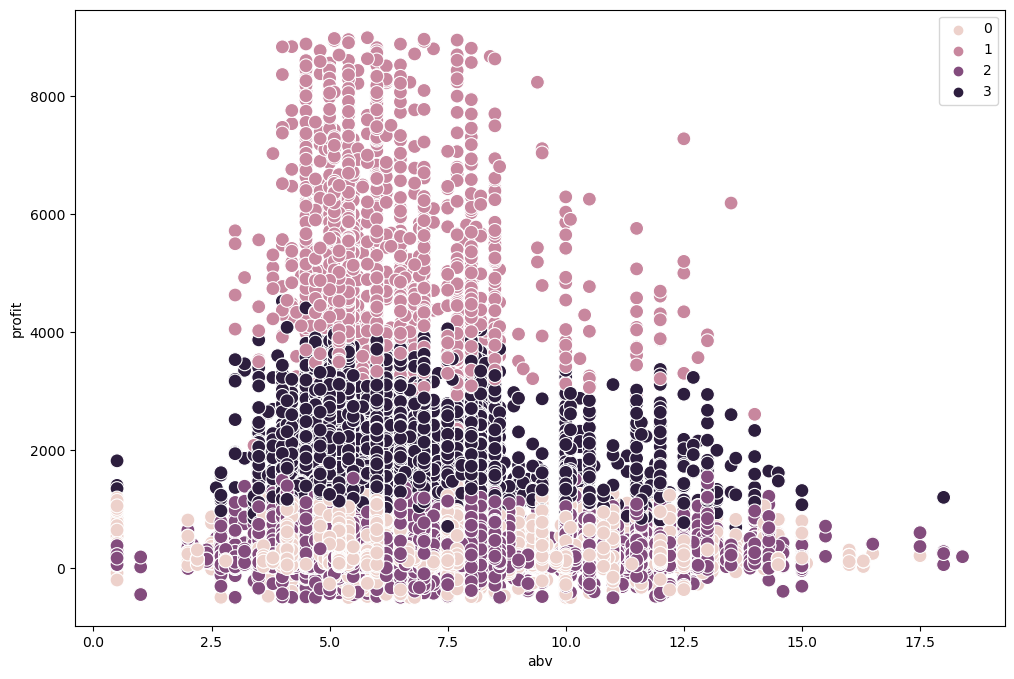

In [22]:
# Plot the clusters for the "abv" and "profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['abv'], y=df_sub['profit'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('abv') # Label x-axis.
plt.ylabel('profit') # Label y-axis.
plt.show()

### Notes on clusters - 
1. percent markup and profit: 
- theres a big cluster (dark purple) with high profits (b/w 2-8,000 rubles)
- most of the pink cluster percent markup's are between 50 and 150 percent markup and there's a rise in profit when percent markup rises
- the light pink and purple clusters don't have a profit over about 1,000 rubles and the percent markup mostly ranges from 0-225
- the negative percent markups show no profit at all

2. time and units_sold:
- this looks different than expected
- I'd like to explore the data further here

3. abv and profit
- dark purple clusters show profits between 4-8,000+ rubles and are mostly 4.5-9.0 abv
- pink clusters show profits mostly between 1-3,500 rubles and are mostly 4.5-9.0 abv
- higher abv (above 9.0) show similar patterns, there are just less data points

In [23]:
df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = '4. dark purple'
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = '3. purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = '2. pink'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = '1. light pink'

/var/folders/w0/qzmf_lf542x0x6lpcdj7lnww0000gn/T/ipykernel_11723/2198932688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = '4. dark purple'


In [24]:
df_sub.groupby('cluster').agg({'abv':['mean', 'median'], 
                         'profit':['mean', 'median'],
                         'percent_markup':['mean', 'median'],
                         'time':['mean', 'median'],
                          'units_sold':['mean', 'median']})

abv              profit          percent_markup          \
                    mean median         mean   median           mean  median   
cluster                                                                        
1. light pink   6.541882    6.0   317.562794   217.00      80.894651   83.25   
2. pink         6.386195    6.0  5276.784810  4922.30     115.727239  112.41   
3. purple       6.783303    6.2   308.863812   218.00      70.863659   72.84   
4. dark purple  6.475740    6.0  1963.669547  1817.62     103.433566   97.87   

                     time        units_sold         
                     mean median       mean median  
cluster                                             
1. light pink   16.245496   17.0   2.138896   1.00  
2. pink         15.734177   17.0  16.364812  15.75  
3. purple       15.558646   17.0   1.951757   1.00  
4. dark purple  15.882341   17.0   8.247794   6.75

### Notes on cluster descriptive statistics - 
1. dark purple has the highest median profit, percent markup and units sold, so we could look into a comparison of individual beer sales vs packs of beer / barrels sales. To see if the bar is selling mostly individual beers or multiples and how to increase profit based on this information.
2. Also, it looks like pink and dark purple have the highest profit, percent markup and units_sold, then light pink and purple  share similar statistics with each other. 